In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
df = pd.read_excel('Orders.xlsx')
df.head(2)

,Order ID,Customer Name,Restaurant ID,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,OD1,Srini,6,2022-01-01 23:15:00,5,633,Debit Card,47,5,3
1,OD2,Revandh,13,2022-01-01 19:21:00,5,258,Credit Card,41,3,5


In [4]:
df1 = pd.read_excel('Restaurants.xlsx')
df1.head()

,RestaurantID,RestaurantName,Cuisine,Zone,Category
0,1,The Cave Hotel,Continental,Zone B,Pro
1,2,SSK Hotel,North Indian,Zone D,Pro
2,3,ASR Restaurant,South Indian,Zone D,Ordinary
3,4,Win Hotel,South Indian,Zone D,Ordinary
4,5,Denver Restaurant,Continental,Zone D,Pro


In [5]:
df2 = pd.merge(df, df1, left_on = "Restaurant ID", right_on = "RestaurantID", how = "inner")
df2.head()

,Order ID,Customer Name,Restaurant ID,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery,RestaurantID,RestaurantName,Cuisine,Zone,Category
0,OD1,Srini,6,2022-01-01 23:15:00,5,633,Debit Card,47,5,3,6,Willies,French,Zone D,Pro
1,OD68,Gopal,6,2022-01-01 11:10:00,5,345,Cash on Delivery,22,4,5,6,Willies,French,Zone D,Pro
2,OD76,Srini,6,2022-01-01 12:19:00,7,934,Debit Card,30,2,4,6,Willies,French,Zone D,Pro
3,OD78,Vinny,6,2022-01-01 11:15:00,5,908,Debit Card,15,3,2,6,Willies,French,Zone D,Pro
4,OD96,David,6,2022-01-01 15:22:00,4,300,Cash on Delivery,27,2,2,6,Willies,French,Zone D,Pro


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


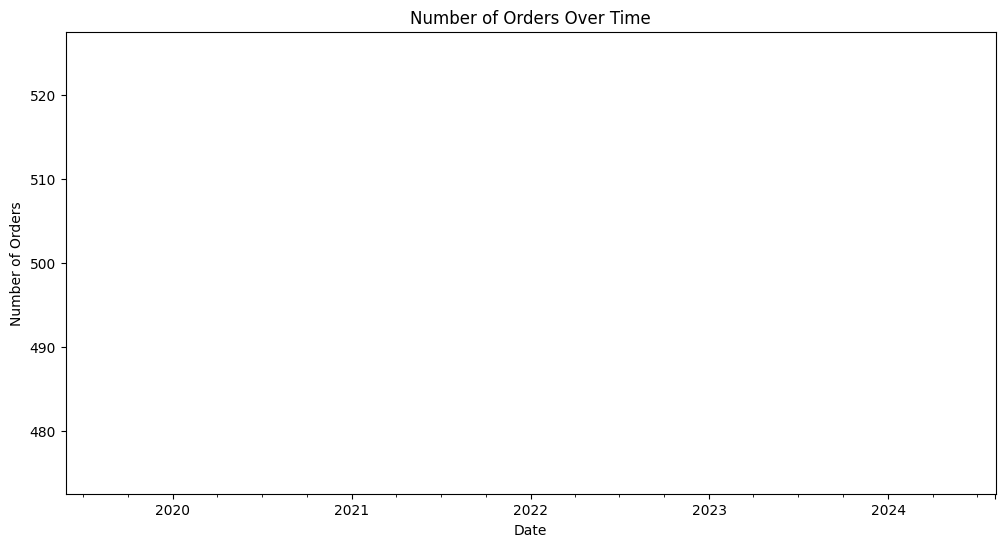

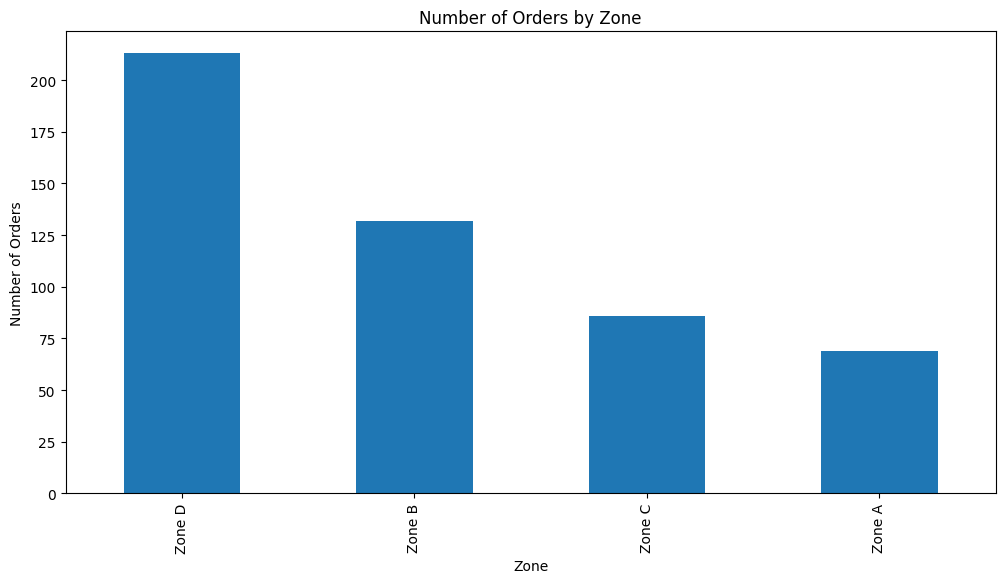

In [6]:
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime if not already done
df2['Order Date'] = pd.to_datetime(df2['Order Date'])

# 1. Analyze the number of orders over time
orders_over_time = df2.set_index('Order Date').resample('D').size()
plt.figure(figsize=(12, 6))
orders_over_time.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

# 2. Analyze the number of orders by zone
orders_by_zone = df2['Zone'].value_counts()
plt.figure(figsize=(12, 6))
orders_by_zone.plot(kind='bar')
plt.title('Number of Orders by Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Orders')
plt.show()

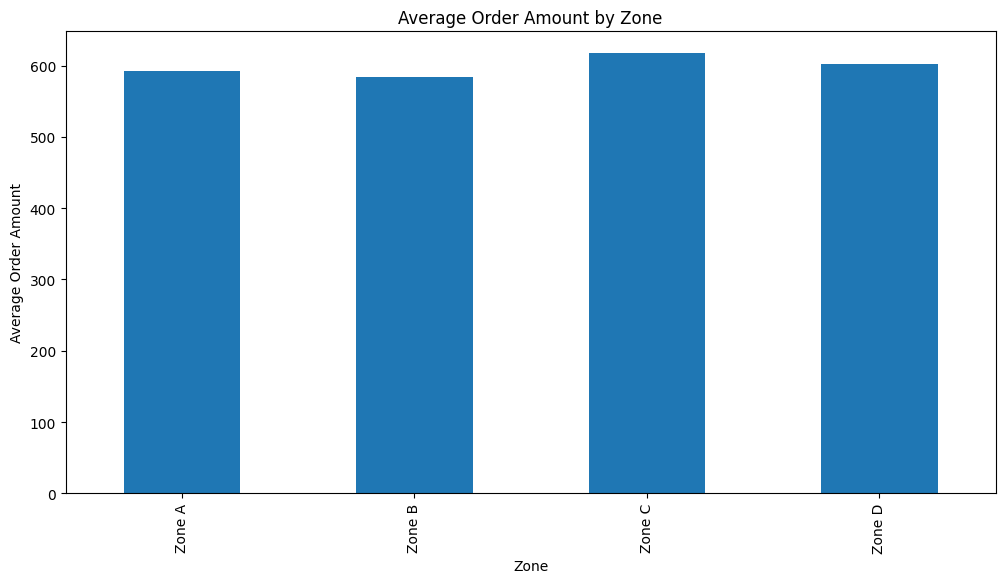

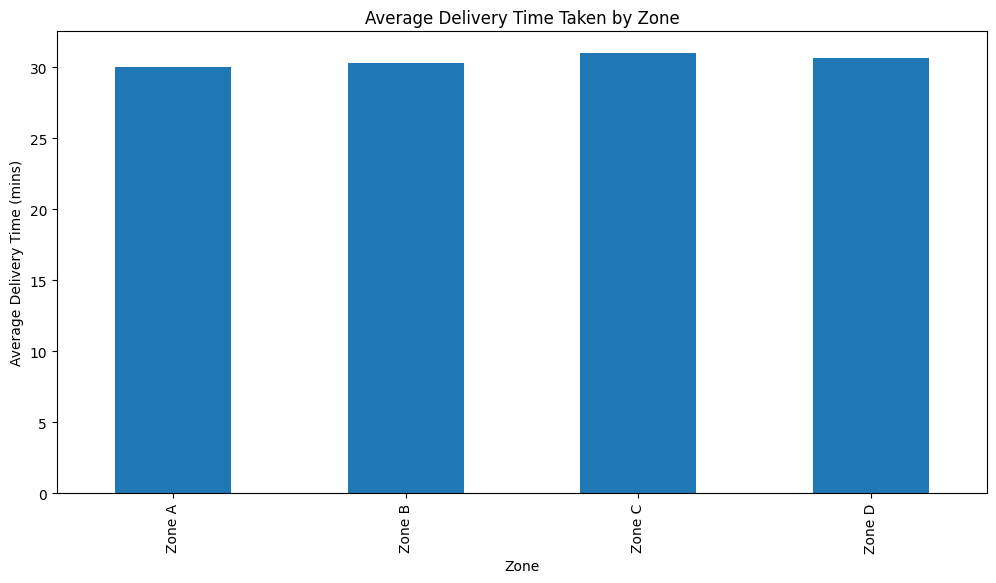

In [7]:
# 1. Analyze the average order amount by zone
avg_order_amount_by_zone = df2.groupby('Zone')['Order Amount'].mean()
plt.figure(figsize=(12, 6))
avg_order_amount_by_zone.plot(kind='bar')
plt.title('Average Order Amount by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Order Amount')
plt.show()

# 2. Analyze the average delivery time taken by zone
avg_delivery_time_by_zone = df2.groupby('Zone')['Delivery Time Taken (mins)'].mean()
plt.figure(figsize=(12, 6))
avg_delivery_time_by_zone.plot(kind='bar')
plt.title('Average Delivery Time Taken by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Delivery Time (mins)')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.se

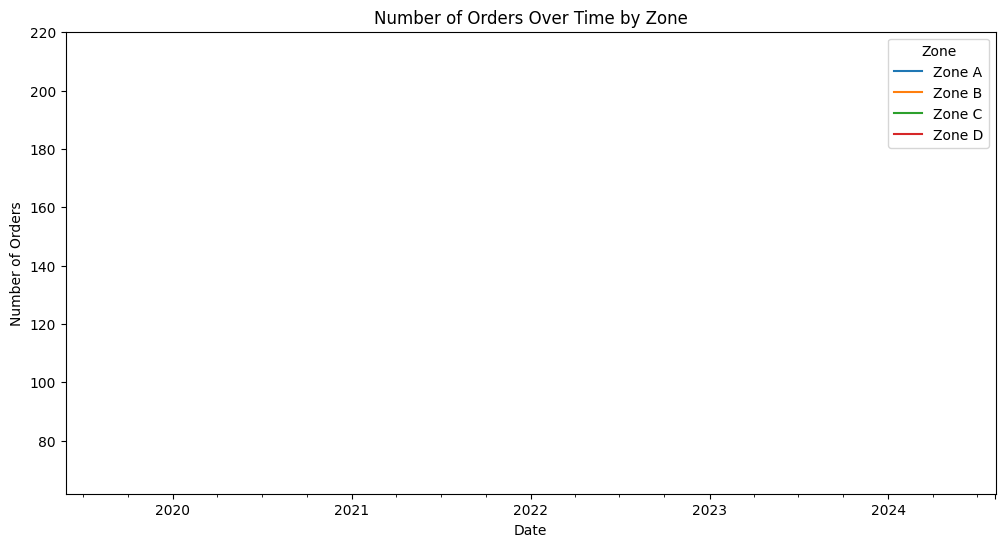

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1399: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.se

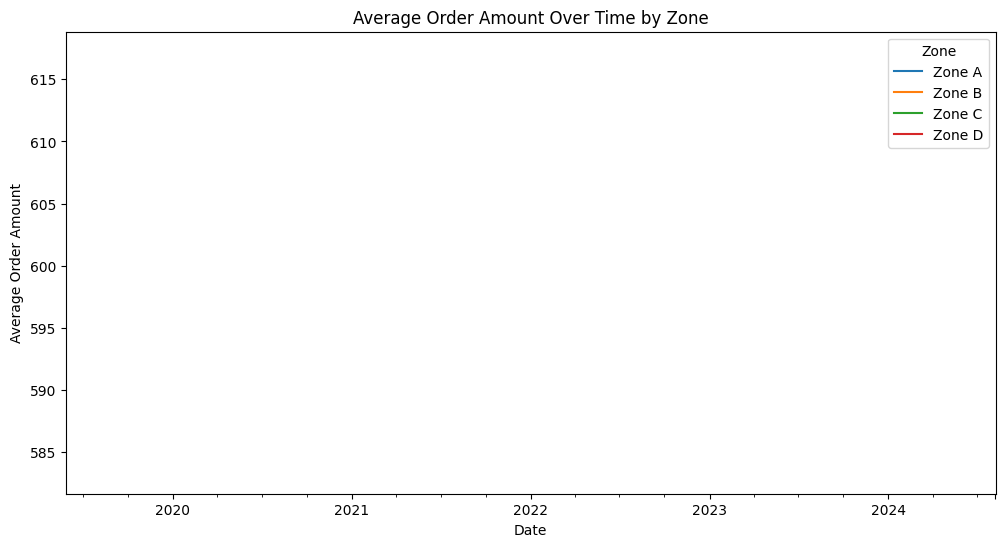

In [8]:
# 1. Number of Orders Over Time by Zone
orders_over_time_by_zone = df2.set_index('Order Date').groupby('Zone').resample('D').size().unstack(level=0, fill_value=0)
plt.figure(figsize=(12, 6))
orders_over_time_by_zone.plot(ax=plt.gca())
plt.title('Number of Orders Over Time by Zone')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend(title='Zone')
plt.show()

# 2. Average Order Amount Over Time by Zone
avg_order_amount_over_time_by_zone = df2.set_index('Order Date').groupby('Zone').resample('D')['Order Amount'].mean().unstack(level=0, fill_value=0)
plt.figure(figsize=(12, 6))
avg_order_amount_over_time_by_zone.plot(ax=plt.gca())
plt.title('Average Order Amount Over Time by Zone')
plt.xlabel('Date')
plt.ylabel('Average Order Amount')
plt.legend(title='Zone')
plt.show()

Spatial Analysis

In [9]:
spatial_analysis = df2.groupby('Zone').agg(
    total_orders=('Order ID', 'count'),
    total_revenue=('Order Amount', 'sum'),
    avg_delivery_time=('Delivery Time Taken (mins)', 'mean'),
    avg_food_rating=('Customer Rating-Food', 'mean'),
    avg_delivery_rating=('Customer Rating-Delivery', 'mean')
).reset_index()

In [10]:
print("Spatial Analysis (By Zone):")
print(spatial_analysis.head())

Spatial Analysis (By Zone):
     Zone  total_orders  total_revenue  avg_delivery_time  avg_food_rating   
0  Zone A            69          40833          30.000000         3.289855  \
1  Zone B           132          77001          30.303030         3.393939   
2  Zone C            86          53074          30.988372         3.453488   
3  Zone D           213         128163          30.685446         3.328638   

   avg_delivery_rating  
0             2.971014  
1             2.984848  
2             3.081395  
3             2.967136  


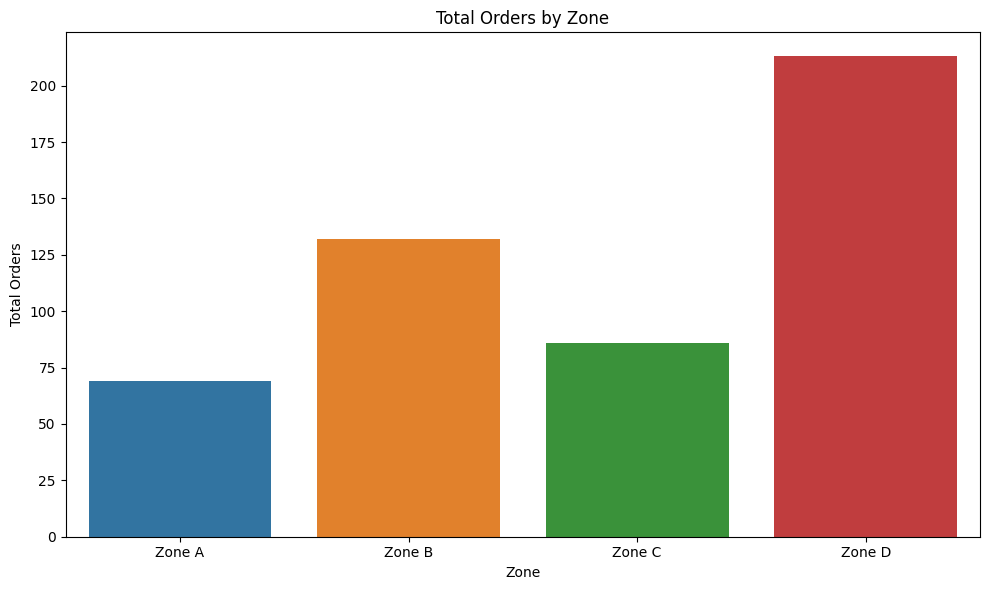

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Zone', y='total_orders', data=spatial_analysis, label='Total Orders')
plt.title('Total Orders by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.show()

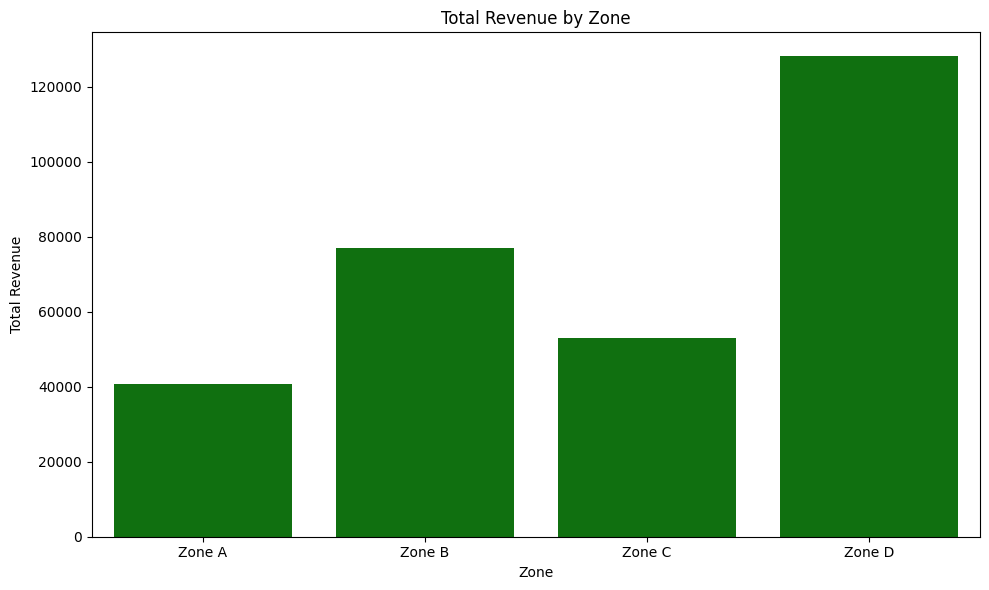

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Zone', y='total_revenue', data=spatial_analysis, label='Total Revenue', color='green')
plt.title('Total Revenue by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

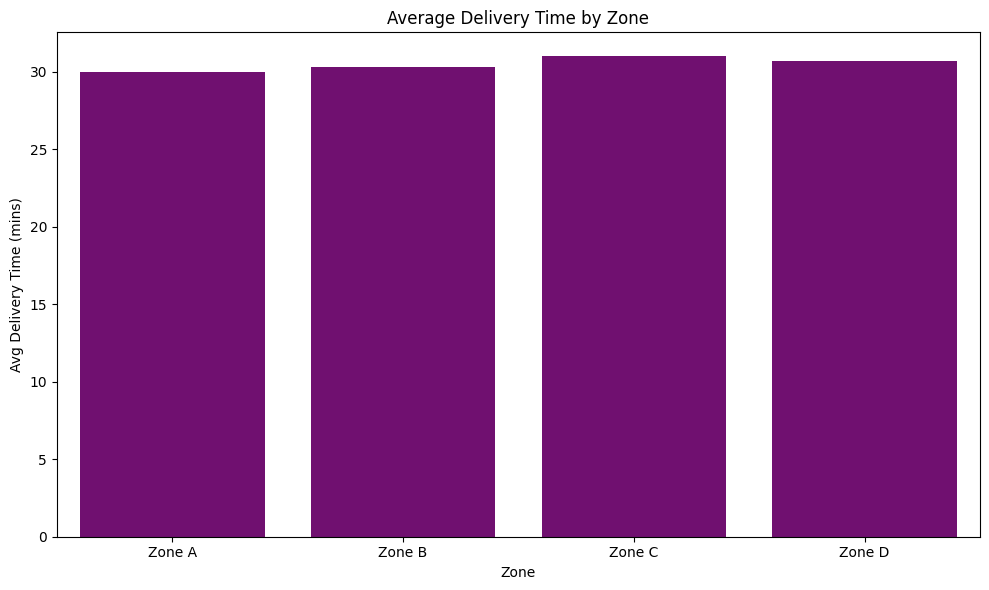

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Zone', y='avg_delivery_time', data=spatial_analysis, label='Avg Delivery Time', color='purple')
plt.title('Average Delivery Time by Zone')
plt.xlabel('Zone')
plt.ylabel('Avg Delivery Time (mins)')
plt.tight_layout()
plt.show()

Temporal Analysis: Provides a snapshot of order activity and revenue by date, enabling insights into seasonal trends, peak sales periods, and other temporal patterns in the data.

In [14]:
temporal_analysis = df2.groupby(df2['Order Date'].dt.date).agg(
    total_orders=('Order ID', 'count'),
    total_revenue=('Order Amount', 'sum')
).reset_index()

In [15]:
print("Temporal Analysis (Daily):")
print(temporal_analysis.head())

Temporal Analysis (Daily):
   Order Date  total_orders  total_revenue
0  2022-01-01           500         299071


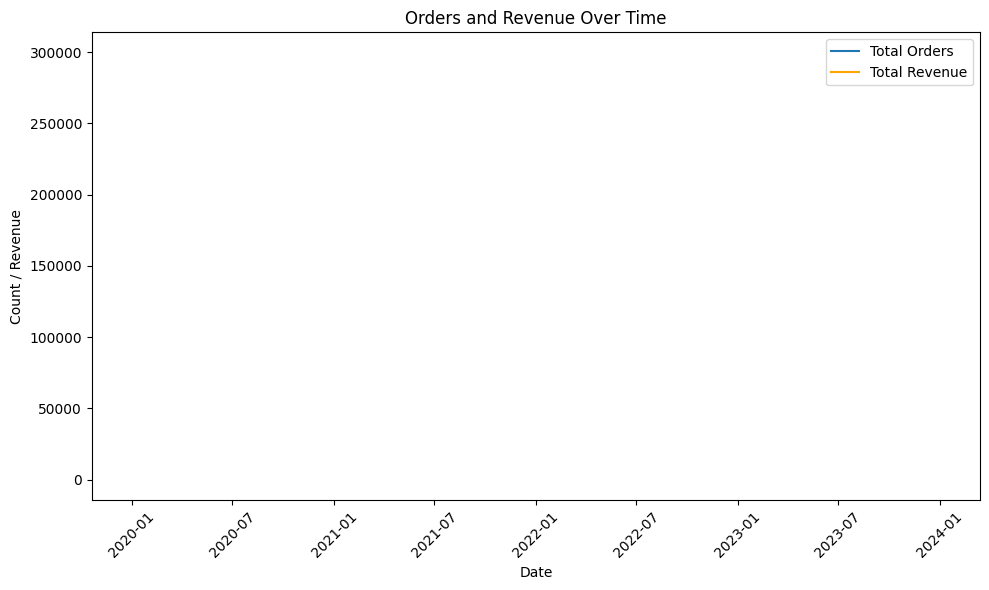

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='total_orders', data=temporal_analysis, label='Total Orders')
sns.lineplot(x='Order Date', y='total_revenue', data=temporal_analysis, label='Total Revenue', color='orange')
plt.title('Orders and Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Count / Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Spatio-Temporal Analysis

In [17]:
spatio_temporal_analysis = df2.groupby([df2['Order Date'].dt.date, 'Zone']).agg(
    total_orders=('Order ID', 'count'),
    total_revenue=('Order Amount', 'sum')
).reset_index()

In [18]:
print("Spatio-Temporal Analysis (By Date and Zone):")
print(spatio_temporal_analysis.head())

Spatio-Temporal Analysis (By Date and Zone):
   Order Date    Zone  total_orders  total_revenue
0  2022-01-01  Zone A            69          40833
1  2022-01-01  Zone B           132          77001
2  2022-01-01  Zone C            86          53074
3  2022-01-01  Zone D           213         128163


In [19]:
heatmap_data = spatio_temporal_analysis.pivot(index='Order Date', columns='Zone', values='total_orders')

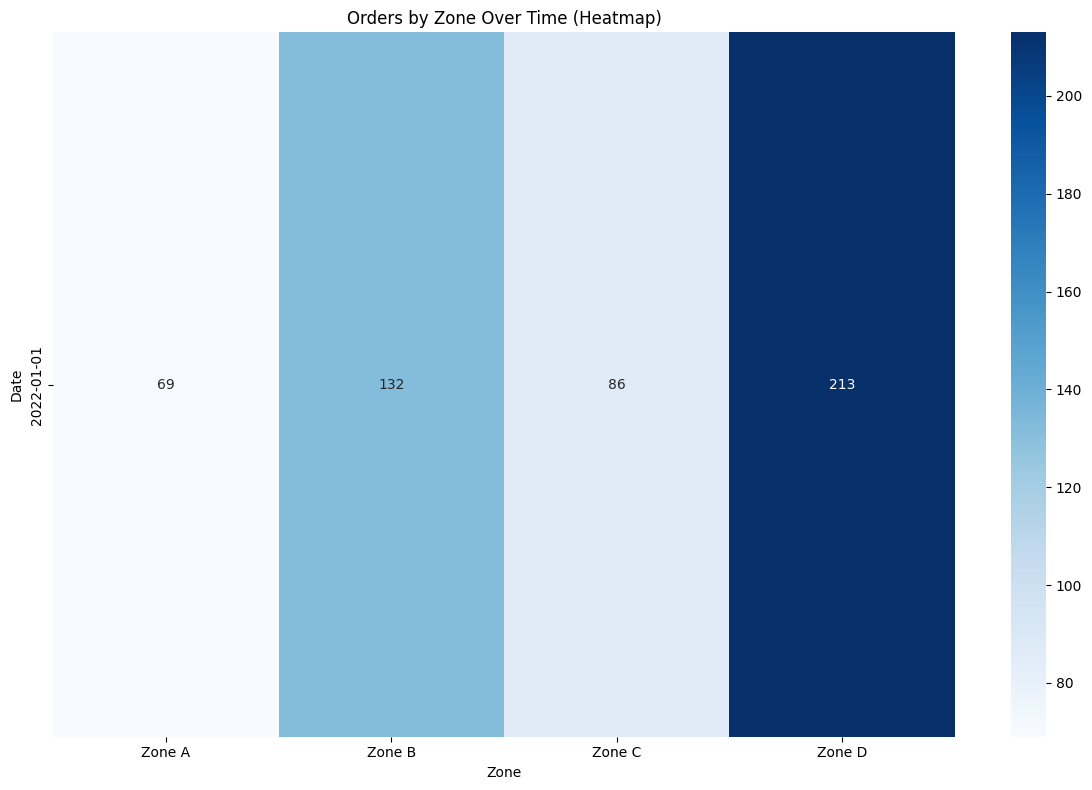

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g')
plt.title('Orders by Zone Over Time (Heatmap)')
plt.xlabel('Zone')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

Static Scatter Map for restaurant or zone locations

In [21]:
import plotly.express as px

# Sample latitude and longitude data for zones
zone_geo_data = {
    'Zone A': [12.9716, 77.5946],
    'Zone B': [12.2958, 76.6394],
    'Zone C': [13.0827, 80.2707],
    'Zone D': [17.3850, 78.4867]
}

# Adding geolocation data to the dataframe
df2['latitude'] = df2['Zone'].map(lambda x: zone_geo_data[x][0])
df2['longitude'] = df2['Zone'].map(lambda x: zone_geo_data[x][1])

fig = px.scatter_mapbox(df2,
                        lat='latitude',
                        lon='longitude',
                        color='Order Amount',
                        size='Order Amount', 
                        hover_name='RestaurantName',
                        hover_data=['Order Date', 'Order Amount'],
                        title='Restaurant Orders',
                        zoom=5,
                        mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Animated Map to show temporal changes in orders; to show how the number of orders or revenue evolves over time.

In [22]:
df2['Order Date'] = pd.to_datetime(df2['Order Date'])
df2['Order Date'] = df2['Order Date'].dt.date

In [23]:
fig = px.scatter_mapbox(df2,
                        lat='latitude',
                        lon='longitude',
                        color='Order Amount',  
                        size='Order Amount',  
                        hover_name='RestaurantName',
                        hover_data=['Order Date', 'Order Amount'],
                        animation_frame='Order Date',  
                        title='Spatio-Temporal Orders Animation',
                        zoom=5,
                        mapbox_style="open-street-map") 
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})                        
fig.show()

Choropleth Map for spatial distribution of orders: To show aggregated data on a map with color shading

In [24]:
spatial_data = df2.groupby('Zone').agg(
    total_orders=('Order ID', 'count'),
    total_revenue=('Order Amount', 'sum')
).reset_index()

# Adding geolocation data to the aggregated data
spatial_data['latitude'] = spatial_data['Zone'].map(lambda x: zone_geo_data[x][0])
spatial_data['longitude'] = spatial_data['Zone'].map(lambda x: zone_geo_data[x][1])

fig = px.scatter_mapbox(spatial_data,
                        lat='latitude',
                        lon='longitude',
                        color='total_orders', 
                        size='total_orders',  
                        hover_name='Zone',
                        hover_data=['total_orders', 'total_revenue'],
                        title='Total Orders by Zone',
                        zoom=5,
                        mapbox_style="open-street-map")  

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) 
fig.show()


Heatmap with Temporal Changes: To show intensity at different geographic locations over time

In [25]:
import plotly.graph_objects as go

# Create the heatmap layers
fig = go.Figure()

# Loop through each date and add scatter plots for each time frame
for date, group in df2.groupby('Order Date'):
    fig.add_trace(go.Scattermapbox(
        lat=group['latitude'],
        lon=group['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=group['Order Amount'],
            color=group['Order Amount'],
            colorscale='Viridis',
            showscale=True
        ),
        text=group['RestaurantName'],
        hoverinfo='text+lat+lon',
        name=str(date)
    ))

fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=go.layout.mapbox.Center(lat=12.9716, lon=77.5946),
        zoom=5
    ),
    margin={"r":0,"t":0,"l":0,"b":0},
    title='Heatmap of Orders over Time',
    showlegend=False
)

fig.show()

Using go.Scattermapbox(), looping is done through dates to create layers of data, visualizing the intensity of orders geographically over time.

To apply Geostatistics methods used are:
Spatial Interpolation (Kriging),
Spatial Autocorrelation Analysis (Moran's I),
Variogram Anlysis (to measure spatial correlation)

In [26]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
%pip install pykrige

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


VARIOGRAM: calculating the variogram for the delivery times, based on the restaurant's locations

<Figure size 1000x600 with 0 Axes>

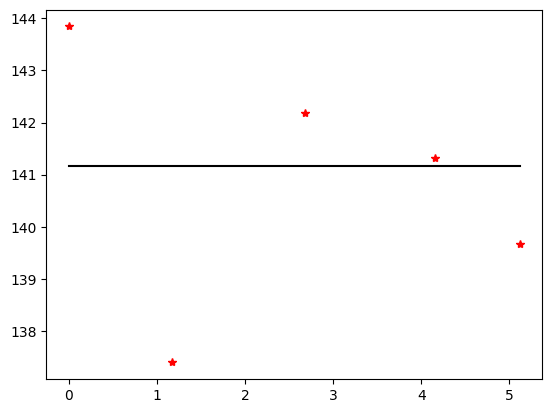

In [28]:
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt

# Extract relevant data for geostatistics (latitude, longitude, and delivery time)
coordinates = df2[['latitude', 'longitude']].values
delivery_times = df2['Delivery Time Taken (mins)'].values

# Create the variogram model using Kriging
OK = OrdinaryKriging(
    coordinates[:, 0], coordinates[:, 1], delivery_times,
    variogram_model='linear', verbose=False, enable_plotting=False
)

plt.figure(figsize=(10, 6))
OK.display_variogram_model()
plt.show()


Given known values at certain points, Kriging allows us to predict the values at unobserved points; predict delivery times at unknown places


Grid is processed in chunks to avoide memory size error

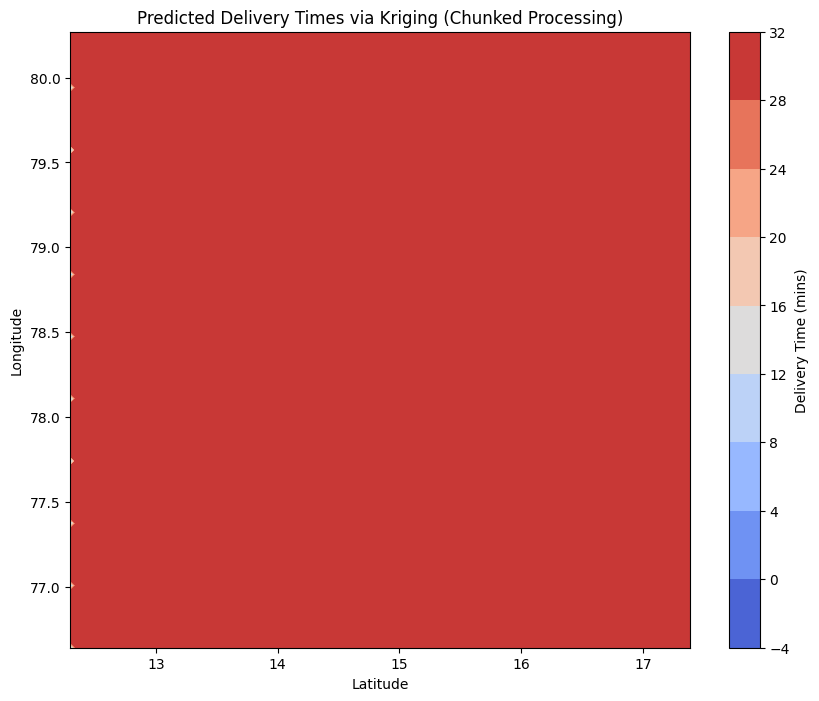

In [29]:
import numpy as np
# Define a function to perform Kriging in smaller chunks (batch processing)
def kriging_in_chunks(grid_lat, grid_lon, chunk_size):
    results = []
    n_chunks = len(grid_lat) // chunk_size
    
    # Loop through chunks of the grid
    for i in range(n_chunks):
        lat_chunk = grid_lat[i * chunk_size: (i + 1) * chunk_size]
        lon_chunk = grid_lon[i * chunk_size: (i + 1) * chunk_size]
        
        # Execute Kriging on the smaller chunk
        z_chunk, ss_chunk = OK.execute('grid', lat_chunk, lon_chunk, backend='vectorized')
        results.append(z_chunk)
    
    # Return the concatenated results
    return np.concatenate(results, axis=0)

# Break down the grid into chunks (adjust chunk_size as per memory constraints)
# Define the grid for latitude and longitude
# Define the grid for latitude and longitude
grid_lat = np.linspace(min(coordinates[:, 0]), max(coordinates[:, 0]), 100)
grid_lon = np.linspace(min(coordinates[:, 1]), max(coordinates[:, 1]), 100)

chunk_size = 10  # Process 10x10 chunks at a time
z = kriging_in_chunks(grid_lat, grid_lon, chunk_size)

# Ensure the total number of elements matches before reshaping
if z.size == len(grid_lat) * len(grid_lon):
    z = z.reshape((len(grid_lat), len(grid_lon)))
else:
    z = np.resize(z, (len(grid_lat), len(grid_lon)))

# Plot the predicted delivery times for the chunks
plt.figure(figsize=(10, 8))
plt.contourf(grid_lat, grid_lon, z, cmap='coolwarm')
plt.title('Predicted Delivery Times via Kriging (Chunked Processing)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Delivery Time (mins)')
plt.show()


Measuring similar delivery times of nearby locations using Moran's I

In [30]:
%pip install pysal

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\spaghetti\network.py:41: FutureWarning:

The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning:

The weights matrix is not fully connected: 
 There are 4 disconnected components.



Moran's I: -0.004381435669144379, p-value: 0.468


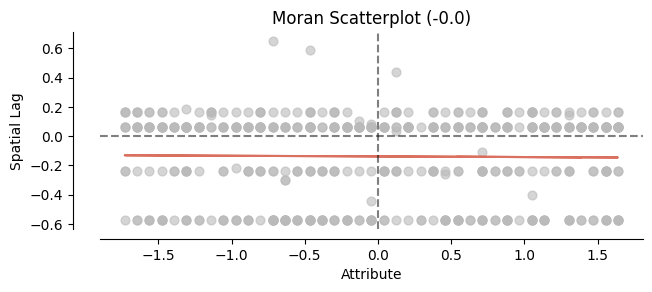

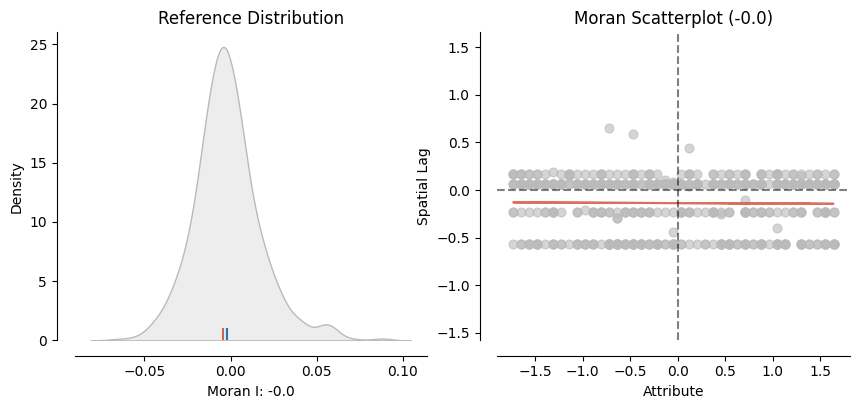

In [31]:
import pysal.lib as ps
from pysal.explore import esda
from pysal.viz import splot
from splot.esda import moran_scatterplot

# Create a weights matrix based on spatial proximity (e.g., K-nearest neighbors)
w = ps.weights.KNN.from_array(coordinates, k=4)  # k nearest neighbors

# Standardize weights
w.transform = 'r'

# Calculate Moran's I for the delivery times
moran = esda.Moran(delivery_times, w)

# Display Moran's I value
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

moran_scatterplot(moran)
splot.esda.plot_moran(moran)
plt.show()

Time Series Analysis:
Time series analysis focuses on analyzing data that is sequential in time. It can help identify trends, seasonal patterns, and other temporal dependencies in the data.

In [32]:
df2['Order Date'] = pd.to_datetime(df2['Order Date'])  # Ensure 'Order Date' is datetime
df2.set_index('Order Date', inplace=True)  # Set 'Order Date' as the index

daily_orders = df2.resample('D').size()  # Number of orders per day

print(daily_orders.head())

Order Date
2022-01-01    500
Freq: D, dtype: int64


trend analysis: smooth out short termfluctuations and highlight longterm trends

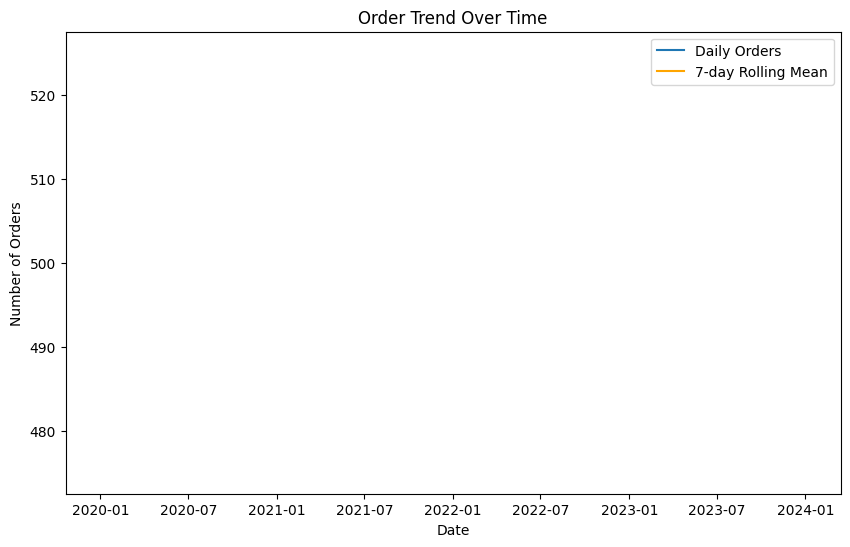

In [33]:
# Calculate rolling mean to identify trends (e.g., 7-day rolling average)
rolling_mean = daily_orders.rolling(window=7).mean()

# Plot the original data and the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(daily_orders, label='Daily Orders')
plt.plot(rolling_mean, label='7-day Rolling Mean', color='orange')
plt.title('Order Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

seasonality analysis: repetetion of patterns at regular intervals. Components: trend, seasonal and residual

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure daily_orders has a DatetimeIndex with a frequency set
daily_orders = daily_orders.asfreq('D')

# Filter to ensure at least 14 observations
if len(daily_orders) >= 14:
    # Decompose the time series
    decomposition = seasonal_decompose(daily_orders, model='additive', period=7)

    # Plot the decomposed components
    decomposition.plot()
    plt.show()
else:
    print("Not enough data for seasonal decomposition. At least 14 observations are required.")


Not enough data for seasonal decomposition. At least 14 observations are required.


Seasonal decomposition cannot be applied as only 1 observation is present


Timeseries forecasting

ARIMA: AutoRegressive Integrated Moving Average; used to preict future value using past values

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.



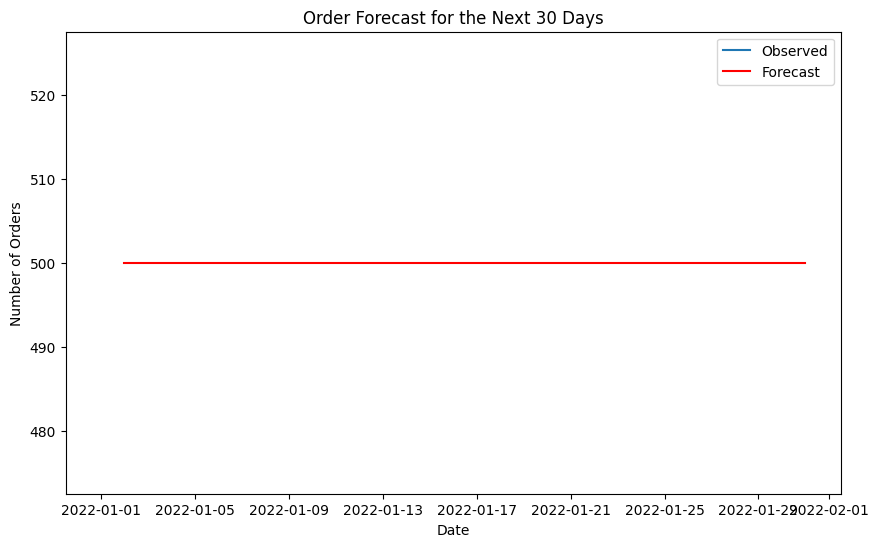

In [35]:
from statsmodels.tsa.arima.model import ARIMA

daily_orders = daily_orders.fillna(method='ffill')

model = ARIMA(daily_orders, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10, 6))
plt.plot(daily_orders, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Order Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

Analysing delivery times as a time series

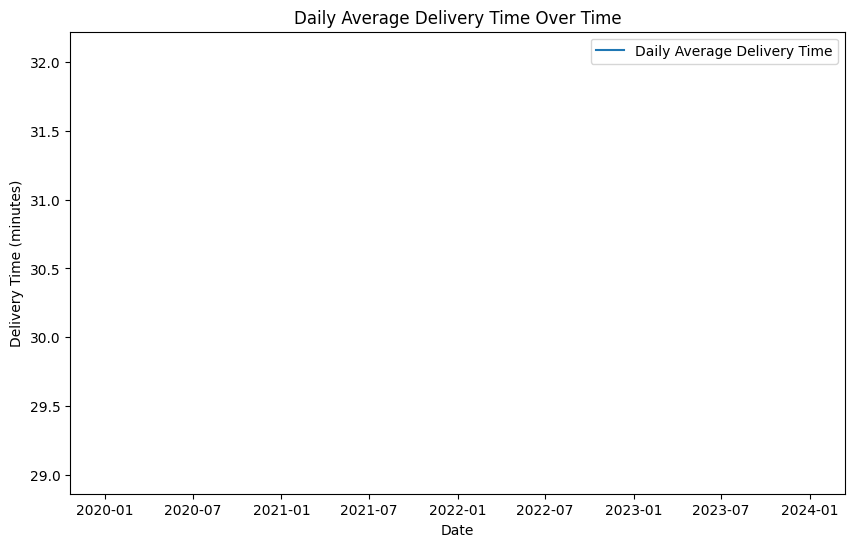

In [36]:
daily_delivery_time = df2['Delivery Time Taken (mins)'].resample('D').mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_delivery_time, label='Daily Average Delivery Time')
plt.title('Daily Average Delivery Time Over Time')
plt.xlabel('Date')
plt.ylabel('Delivery Time (minutes)')
plt.legend()
plt.show()

Comparison between two datasets

In [37]:
from sklearn.metrics import mean_squared_error

In [39]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [54]:
train_df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
Order_Date,,,,,,,,,,,,,,,,,,,
2022-03-19,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
2022-03-25,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2022-03-19,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
2022-04-05,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
2022-03-26,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [55]:
test_df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
Order_Date,,,,,,,,,,,,,,,,,,
2022-03-30,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
2022-03-29,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2022-03-10,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
2022-04-02,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
2022-03-27,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [42]:
train_df['Order_Date'] = pd.to_datetime(train_df['Order_Date'])
train_df.set_index('Order_Date', inplace=True)

test_df['Order_Date'] = pd.to_datetime(test_df['Order_Date'])
test_df.set_index('Order_Date', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_288\1863786903.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\HP\AppData\Local\Temp\ipykernel_288\1863786903.py:4: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Selecting a target value for modeling

In [56]:
train_values = train_df['multiple_deliveries']
test_values = test_df['multiple_deliveries']

In [67]:
print("Checking for NaN values in the training data:")
print(train_df.isna().sum())

print("Checking for NaN values in the test data:")
print(test_df.isna().sum())

train_df.fillna(method='ffill', inplace=True)  
test_df.fillna(method='ffill', inplace=True)

Checking for NaN values in the training data:
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64
Checking for NaN values in the test data:
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Ord

ARIMA model on training data

In [69]:
model = ARIMA(train_values, order=(5,1,0))  
arima_model = model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

c:\Users\HP\AppData\Local\Programs\Python\Pyth

Forecasting on test data

In [59]:
forecast = arima_model.forecast(steps=len(test_values))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [70]:
print("Checking for NaN values in the forecast:")
print(pd.Series(forecast).isna().sum())

Checking for NaN values in the forecast:
0


In [71]:
forecast = np.nan_to_num(forecast)

In [72]:
#forecast = np.array(forecast)
#test_values = np.array(test_values)

In [82]:
print("Checking for NaN values in the forecast:")
print(np.isnan(forecast).sum())  

# Convert test_values to a numpy array of type float
test_values = np.array(test_values, dtype=float)
print("Checking for NaN values in the test_values:")
print(np.isnan(test_values).sum())

Checking for NaN values in the forecast:
0
Checking for NaN values in the test_values:
0


In [81]:
test_values = pd.Series(test_values).fillna(method='ffill').to_numpy()


In [83]:
mse = mean_squared_error(test_values, forecast[:len(test_values)])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.32974641374503877


Comparison

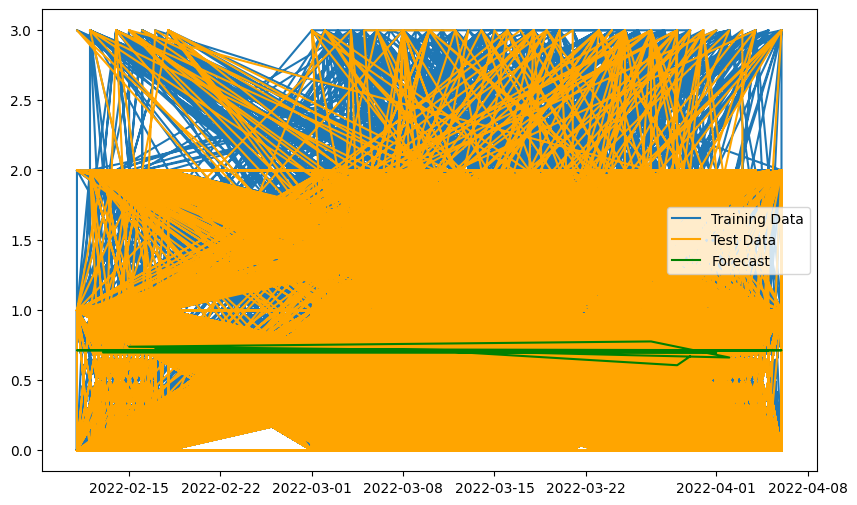

In [86]:
plt.figure(figsize=(10,6))
plt.plot(train_values.index, train_values, label='Training Data')
plt.plot(test_df.index, pd.Series(test_values, index=test_df.index), label='Test Data', color='orange')
plt.plot(test_df.index, pd.Series(forecast[:len(test_values)], index=test_df.index), label='Forecast', color='green')
plt.legend()
plt.show()

In [89]:
train_lats = train_df['Delivery_location_latitude']
train_lons = train_df['Delivery_location_longitude']
train_values = train_df['multiple_deliveries']

In [90]:
test_lats = test_df['Delivery_location_latitude']
test_lons = test_df['Delivery_location_longitude']

In [102]:
# Define batch size for processing (you can adjust this based on memory capacity)
batch_size = 10  # Number of points to process at once

# Initialize an empty list to store the predictions and variance (kriging variance)
z_pred = []
ss_pred = []

# Define the kriging model using the training data in batches
OK = OrdinaryKriging(train_lons[:batch_size], train_lats[:batch_size], train_values[:batch_size], variogram_model='linear')

# Process the test data in batches
num_batches = int(np.ceil(len(test_lons) / batch_size))

for i in range(num_batches):
    # Define the start and end indices for the current batch
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(test_lons))  # Ensure we don't go out of bounds

    # Extract the current batch of test coordinates
    test_lons_batch = test_lons[start_idx:end_idx]
    test_lats_batch = test_lats[start_idx:end_idx]

    # Perform kriging on the current batch
    z, ss = OK.execute('points', test_lons_batch, test_lats_batch)

    # Append the results to the list
    z_pred.extend(z)
    ss_pred.extend(ss)

# Convert the lists back to numpy arrays for further use
z_pred = np.array(z_pred)
ss_pred = np.array(ss_pred)

# Now `z_pred` contains the kriging predictions and `ss_pred` contains the kriging variances for the entire test set

# Print or analyze the results
print("Kriging predictions (z):", z_pred)
print("Kriging variances (ss):", ss_pred)


Kriging predictions (z): [0.99973957 0.99942474 1.52327385 ... 0.45732399 0.43374405 1.00039497]
Kriging variances (ss): [0.00211704 0.00629328 0.32372549 ... 0.43292934 0.35474062 0.01740536]


In [107]:
z_pred_filled = np.nan_to_num(z_pred)  # Ensure z_pred_filled is defined
z_pred_filled = np.array(z_pred_filled, dtype=float)
print("Checking for NaN values in the test_values:")
print(np.isnan(z_pred_filled).sum())

Checking for NaN values in the test_values:
0


In [110]:
# Ensure no NaN values in both arrays
test_values_filled = np.nan_to_num(test_values)
z_pred_filled = np.nan_to_num(z_pred_filled)

mse_kriging = mean_squared_error(test_values_filled, z_pred_filled)
print(f'Mean Squared Error (Kriging): {mse_kriging}')

Mean Squared Error (Kriging): 0.6133243229210883


Comparison

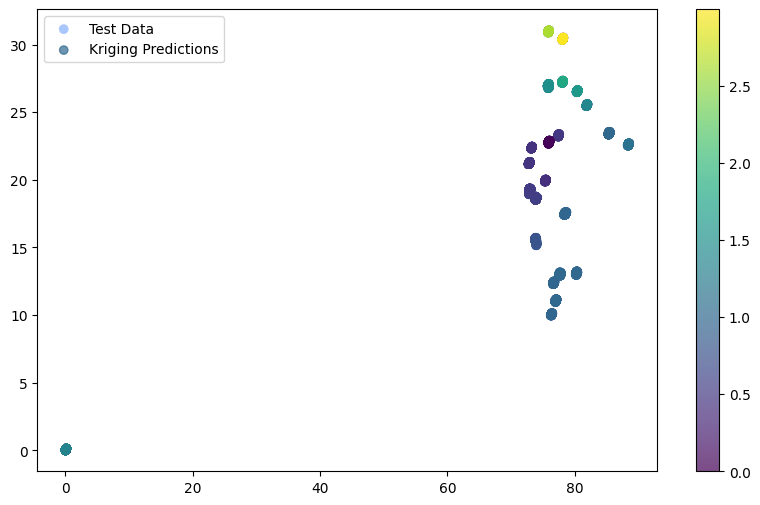

In [112]:
plt.figure(figsize=(10,6))
plt.scatter(test_lons, test_lats, c=test_values, label='Test Data', cmap='coolwarm')
plt.scatter(test_lons, test_lats, c=z_pred, label='Kriging Predictions', cmap='viridis', alpha=0.7)
plt.colorbar()
plt.legend()
plt.show()